# Projekt z Podstaw Sztucznej Inteligencji

W projekcie wykorzystujemy informacje zebrane podczas gry w Affective SpaceShooter 2.
Analizujemy dane pod kątem zależności między wynikiem gry a poszczególnymi cechami osobowości.

## Preprocessing

In [4]:
import pandas as pd
import numpy as np
import csv


md = pd.read_csv("BIRAFFE-metadata.csv", sep=';')
#usunięcie tych rekordów gdzie osoba nie ma danych z gry w space
md = md[pd.notnull(md['SPACE'])]
md = md[pd.notnull(md['OPENNESS'])]
#zostawienie id tych osób, bo pliki mają w nazwie id
ids = md['ID'].values

import csv
import json    
print("start")
pd.set_option('display.max_columns', 500)
#import metadata
data = pd.read_csv("merged_scores.csv", sep=',')
data = data[pd.notnull(data['OPENNESS'])]
data = data[pd.notnull(data['CONSCIENTIOUSNESS'])]
data = data[pd.notnull(data['EXTRAVERSION'])]
data = data[pd.notnull(data['AGREEABLENESS'])]
data = data[pd.notnull(data['NEUROTICISM'])]

data=data[data.Score == 'GameOver']
#data.head(25)
type(data)
mean_c=[]

with open('mean_scores.csv', 'w', newline='') as csvfile:
    #nazwy kolumn- wszystkie z plików json
    fieldnames = ["P_ID","OPENNESS","CONSCIENTIOUSNESS","EXTRAVERSION","AGREEABLENESS","NEUROTICISM","Mean"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    #ustawienie nagłówków
    writer.writeheader()
    for my_id in ids:
        data1=data.loc[data['P_ID'] == my_id]
        nr=data1.shape[0]
        #print(data1)
        score=data1['Value'].sum()
        if (score):
            mean = score/nr
            #print(mean)
            new_data={ 'P_ID': data1['P_ID'].iloc[0], 'OPENNESS': data1['OPENNESS'].iloc[0], 'CONSCIENTIOUSNESS': data1['CONSCIENTIOUSNESS'].iloc[0],'EXTRAVERSION':  data1['EXTRAVERSION'].iloc[0],'AGREEABLENESS': data1['AGREEABLENESS'].iloc[0],'NEUROTICISM': data1['NEUROTICISM'].iloc[0],'Mean': mean}
            writer.writerow(new_data)



start


Obliczamy średni wynik gry dla każdej osoby, który będziemy zestawiać z cechami osobowości.

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import csv

pd.set_option('display.max_columns', 500)
#import metadata
data = pd.read_csv("mean_scores.csv", sep=',')
data.head()
fig = px.scatter(data, x = 'OPENNESS', y = 'Mean', title='test')
fig.show()
fig1 = px.scatter(data, x = 'CONSCIENTIOUSNESS', y = 'Mean', title='test')
fig1.show()
fig2 = px.scatter(data, x = 'EXTRAVERSION', y = 'Mean', title='test')
fig2.show()
fig3 = px.scatter(data, x = 'AGREEABLENESS', y = 'Mean', title='test')
fig3.show()
fig4 = px.scatter(data, x = 'NEUROTICISM', y = 'Mean', title='test')
fig4.show()

ModuleNotFoundError: No module named 'plotly'

Powyższe wykresy przedstawiają korelację średniego wyniku gry z każdą z cech osobowości. 
Można z nich wywnioskować, że zależności nie istnieją. 

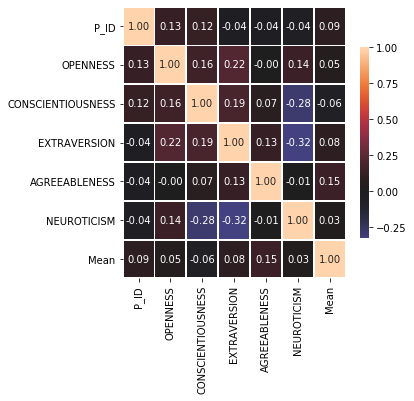

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(), vmax=1.0, center=0, fmt='.2f', linewidths=.9, annot=True,cbar_kws={"shrink": .70})
plt.show();

Powyższe zestawienie również pokazuje, że korelacja między badanymi elementami jest niska.

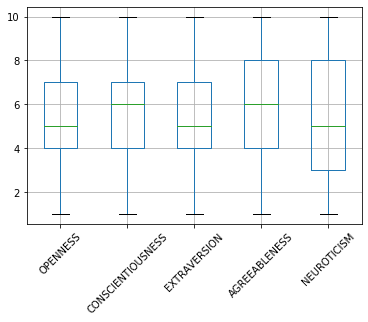

In [4]:
data.boxplot(column=['OPENNESS', 'CONSCIENTIOUSNESS', 'EXTRAVERSION', 'AGREEABLENESS', 'NEUROTICISM'], rot=45)


Większość wyników znajduje się pomiędzy około 400 a 1100 punktów, grupa o średniej <=2000 to najbardziej wiarygodna grupa testowa


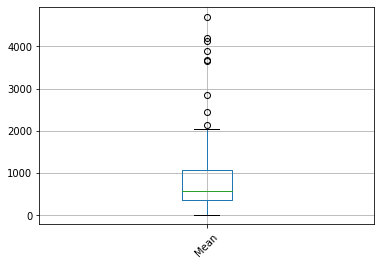

In [5]:
data.boxplot(column=['Mean'], rot=45)
print("Większość wyników znajduje się pomiędzy około 400 a 1100 punktów, grupa o średniej <=2000 to najbardziej wiarygodna grupa testowa")

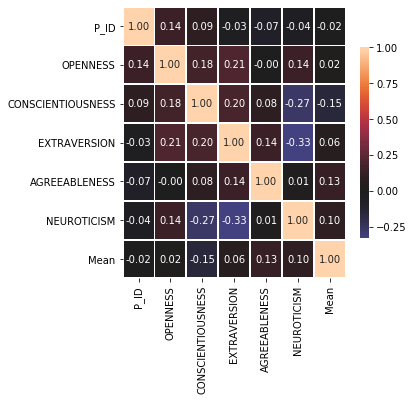

In [6]:
data_trimmed=data.loc[data['Mean'] <= 2000]

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data_trimmed.corr(), vmax=1.0, center=0, fmt='.2f', linewidths=.9, annot=True,cbar_kws={"shrink": .70})
plt.show();

Zestawienie korelacji dla danych testowych, w których średni wynik gry wyniósł <= 2000 punktów.
Korelacja między badanymi elementami nadal jest niska.

In [7]:
pd.set_option('display.max_columns', 500)
#import metadata
data = pd.read_csv("mean_scores.csv", sep=',')
data.head()
fig = px.scatter(data_trimmed, x = 'OPENNESS', y = 'Mean', title='test')
fig.show()
fig1 = px.scatter(data_trimmed, x = 'CONSCIENTIOUSNESS', y = 'Mean', title='test')
fig1.show()
fig2 = px.scatter(data_trimmed, x = 'EXTRAVERSION', y = 'Mean', title='test')
fig2.show()
fig3 = px.scatter(data_trimmed, x = 'AGREEABLENESS', y = 'Mean', title='test')
fig3.show()
fig4 = px.scatter(data_trimmed, x = 'NEUROTICISM', y = 'Mean', title='test')
fig4.show()

Niską korelację potwierdzają również wykresy.

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import linear_model as ln


def showBarPlot(X, Y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    regressor = ln.LinearRegression()  
    regressor.fit(X_train, y_train) #training the algorithm
    print(regressor.score(X_train, y_train))


    #To retrieve the intercept:
    print(regressor.intercept_)
    #For retrieving the slope:
    print(regressor.coef_)


    y_pred = regressor.predict(X_test)

    df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df2 = df1.head(25)


    df2.plot(kind='bar', figsize=(10,5))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    
    print(title)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('\n\n')

    
    
X = data[['OPENNESS']].values
Y = data['Mean'].values #to predict
showBarPlot(X,Y,'OPENNESS - Mean')

X = data[['CONSCIENTIOUSNESS']].values
Y = data['Mean'].values #to predict
showBarPlot(X,Y,'CONSCIENTIOUSNESS - Mean')

X = data[['EXTRAVERSION']].values
Y = data['Mean'].values #to predict
showBarPlot(X,Y,'EXTRAVERSION - Mean')

X = data[['AGREEABLENESS']].values
Y = data['Mean'].values #to predict
showBarPlot(X,Y,'AGREEABLENESS - Mean')

X = data[['NEUROTICISM']].values
Y = data['Mean'].values #to predict
showBarPlot(X,Y,'NEUROTICISM - Mean')


KeyError: 'Mean'

Niska korelacja wpływa na złe wyniki modelu uczonego za pomocą regresji liniowej, który szuka zależności między średnim wynikiem a poszczególnymi cechami osobowości.

0.0004156131312574862
789.4795038111696
[7.41795028]


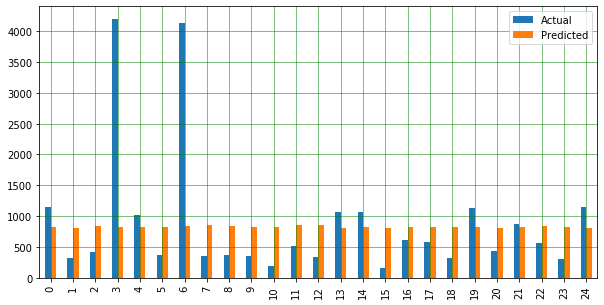

OPENNESS - CONSCIENTIOUSNESS
Mean Absolute Error: 672.1792299179747
Mean Squared Error: 1167758.4080970623
Root Mean Squared Error: 1080.6287096394683
0.0015273433076512521
771.7219891025061
[16.16311479]


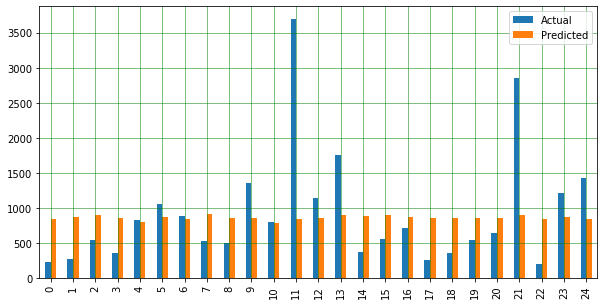

OPENNESS - EXTRAVERSION
Mean Absolute Error: 498.5612626114619
Mean Squared Error: 561435.5034472019
Root Mean Squared Error: 749.289999564389
2.4380013450286953e-06
835.536610084324
[0.63313327]


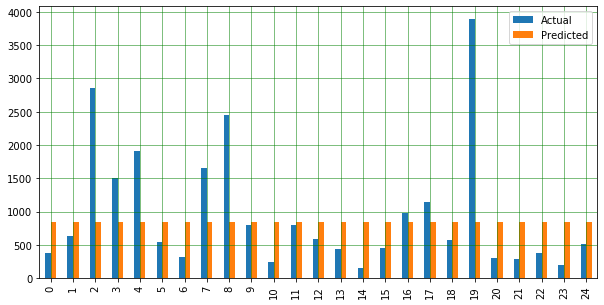

OPENNESS - AGREEABLENESS
Mean Absolute Error: 599.2471407922725
Mean Squared Error: 736917.7614498201
Root Mean Squared Error: 858.4391425429179
0.00440385553786149
753.3942409081637
[30.32644473]


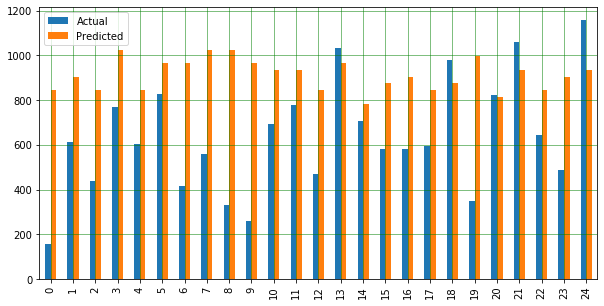

OPENNESS - NEUROTICISM
Mean Absolute Error: 349.60276110670327
Mean Squared Error: 166509.42198216717
Root Mean Squared Error: 408.05566039716587


In [42]:
X = data[['OPENNESS']].values
Y = data['CONSCIENTIOUSNESS'].values #to predict
showBarPlot(X,Y,'OPENNESS - CONSCIENTIOUSNESS')

X = data[['OPENNESS']].values
Y = data['EXTRAVERSION'].values #to predict
showBarPlot(X,Y,'OPENNESS - EXTRAVERSION')

X = data[['OPENNESS']].values
Y = data['AGREEABLENESS'].values #to predict
showBarPlot(X,Y,'OPENNESS - AGREEABLENESS')

X = data[['OPENNESS']].values
Y = data['NEUROTICISM'].values #to predict
showBarPlot(X,Y,'OPENNESS - NEUROTICISM')

In [5]:
X = data[['CONSCIENTIOUSNESS']].values
Y = data['OPENNESS'].values #to predict
showBarPlot(X,Y,'CONSCIENTIOUSNESS - OPENNESS')

X = data[['CONSCIENTIOUSNESS']].values
Y = data['EXTRAVERSION'].values #to predict
showBarPlot(X,Y,'CONSCIENTIOUSNESS - EXTRAVERSION')

X = data[['CONSCIENTIOUSNESS']].values
Y = data['AGREEABLENESS'].values #to predict
showBarPlot(X,Y,'CONSCIENTIOUSNESS - AGREEABLENESS')

X = data[['CONSCIENTIOUSNESS']].values
Y = data['NEUROTICISM'].values #to predict
showBarPlot(X,Y,'CONSCIENTIOUSNESS - NEUROTICISM')

NameError: name 'showBarPlot' is not defined

0.00885506516756662
640.3856229486983
[28.63833918]


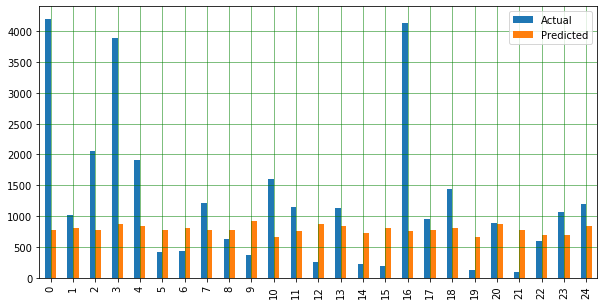

EXTRAVERSION - OPENNESS
Mean Absolute Error: 711.7453846836745
Mean Squared Error: 1314582.1967989272
Root Mean Squared Error: 1146.5523087931606
0.006181885806857301
713.5872651023219
[27.24752332]


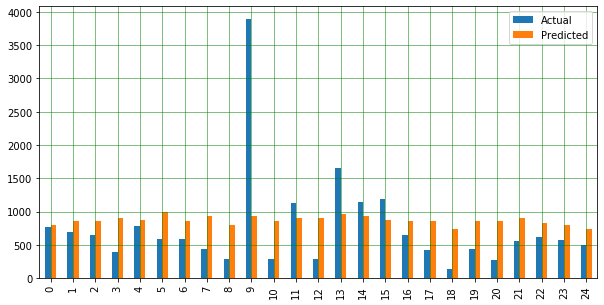

EXTRAVERSION - CONSCIENTIOUSNESS
Mean Absolute Error: 522.0145673632354
Mean Squared Error: 716755.066500325
Root Mean Squared Error: 846.6138827708444
0.0034903601282203485
757.9890634909301
[21.8515278]


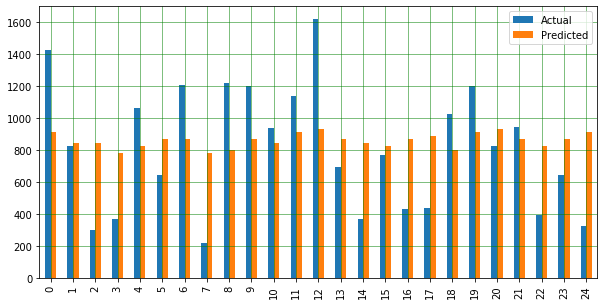

EXTRAVERSION - AGREEABLENESS
Mean Absolute Error: 334.3517342056374
Mean Squared Error: 142537.89522995098
Root Mean Squared Error: 377.541911885225
0.01451386276294564
628.2296891694294
[39.99604019]


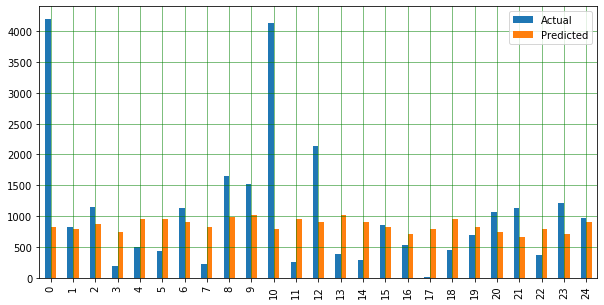

EXTRAVERSION - NEUROTICISM
Mean Absolute Error: 619.6785410333571
Mean Squared Error: 984104.9261302557
Root Mean Squared Error: 992.0206278753762


In [43]:
X = data[['EXTRAVERSION']].values
Y = data['OPENNESS'].values #to predict
showBarPlot(X,Y,'EXTRAVERSION - OPENNESS')

X = data[['EXTRAVERSION']].values
Y = data['CONSCIENTIOUSNESS'].values #to predict
showBarPlot(X,Y,'EXTRAVERSION - CONSCIENTIOUSNESS')

X = data[['EXTRAVERSION']].values
Y = data['AGREEABLENESS'].values #to predict
showBarPlot(X,Y,'EXTRAVERSION - AGREEABLENESS')

X = data[['EXTRAVERSION']].values
Y = data['NEUROTICISM'].values #to predict
showBarPlot(X,Y,'EXTRAVERSION - NEUROTICISM')

0.012693192018132795
600.1623341257456
[40.97471689]


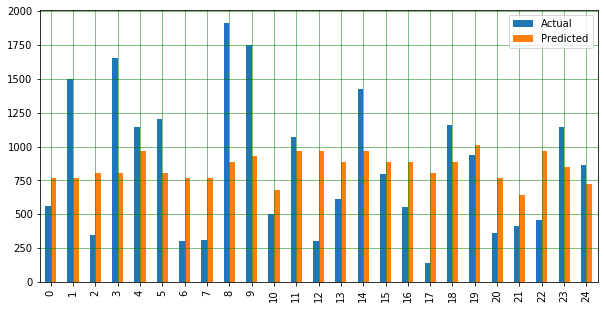

AGREEABLENESS - OPENNESS
Mean Absolute Error: 459.25382371805114
Mean Squared Error: 325618.67147141404
Root Mean Squared Error: 570.6300653412981



0.01064263731354731
618.1026203522171
[36.121054]


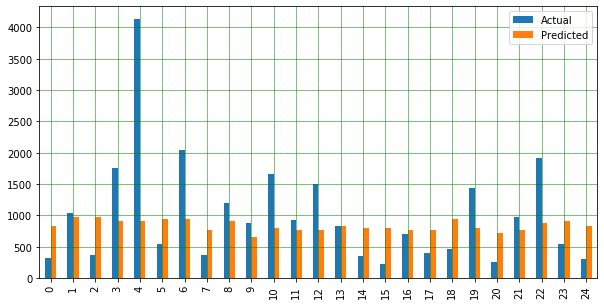

AGREEABLENESS - CONSCIENTIOUSNESS
Mean Absolute Error: 535.334237909444
Mean Squared Error: 612523.2675672298
Root Mean Squared Error: 782.6386570871833



0.014012649100217933
617.4898553722378
[38.92633243]


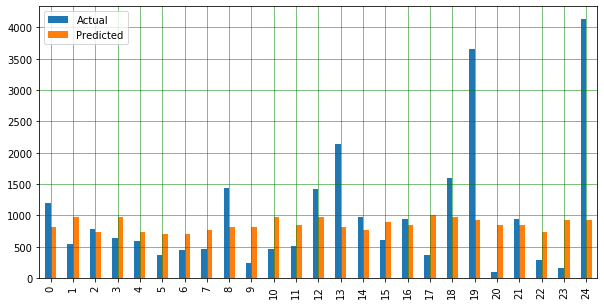

AGREEABLENESS - EXTRAVERSION
Mean Absolute Error: 597.1804187124252
Mean Squared Error: 821646.9448261991
Root Mean Squared Error: 906.4474308122888



0.007450713683692877
616.7857495027756
[22.37430636]


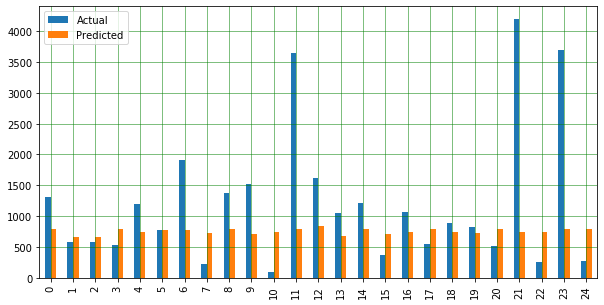

AGREEABLENESS - NEUROTICISM
Mean Absolute Error: 813.7709399446918
Mean Squared Error: 1734739.4715763265
Root Mean Squared Error: 1317.095088281908





In [46]:
X = data[['AGREEABLENESS']].values
Y = data['OPENNESS'].values #to predict
showBarPlot(X,Y,'AGREEABLENESS - OPENNESS')

X = data[['AGREEABLENESS']].values
Y = data['CONSCIENTIOUSNESS'].values #to predict
showBarPlot(X,Y,'AGREEABLENESS - CONSCIENTIOUSNESS')

X = data[['AGREEABLENESS']].values
Y = data['EXTRAVERSION'].values #to predict
showBarPlot(X,Y,'AGREEABLENESS - EXTRAVERSION')

X = data[['AGREEABLENESS']].values
Y = data['NEUROTICISM'].values #to predict
showBarPlot(X,Y,'AGREEABLENESS - NEUROTICISM')

0.0011402262814467212
814.5996195078897
[10.06713797]


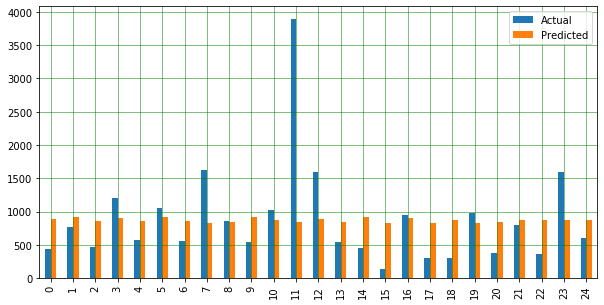

NEUROTICISM - OPENNESS
Mean Absolute Error: 467.72822263203494
Mean Squared Error: 490359.4270106441
Root Mean Squared Error: 700.2566865161975



0.001719772831058508
779.059597301655
[11.21258255]


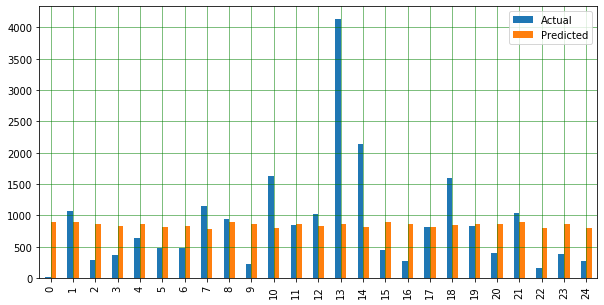

NEUROTICISM - CONSCIENTIOUSNESS
Mean Absolute Error: 638.4312418384837
Mean Squared Error: 1104915.6897835692
Root Mean Squared Error: 1051.1496990360456



0.0007593489616785076
823.6304778708147
[8.21417887]


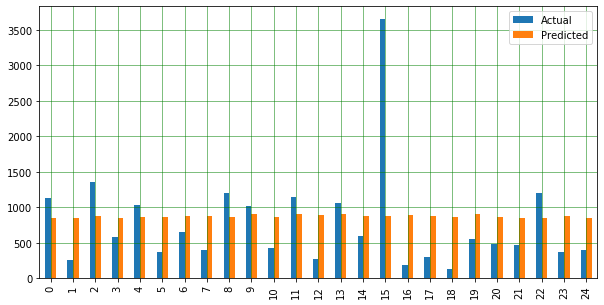

NEUROTICISM - EXTRAVERSION
Mean Absolute Error: 516.7146500236091
Mean Squared Error: 481522.7901602278
Root Mean Squared Error: 693.9184319213806



1.3110758690482172e-05
834.854312793395
[1.06130769]


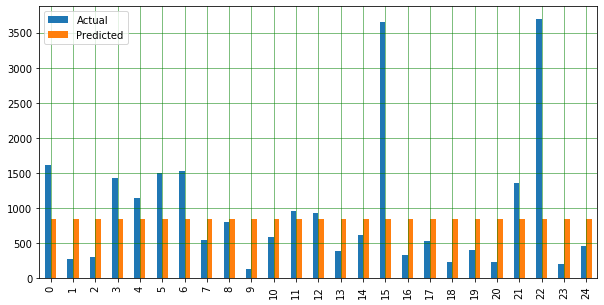

NEUROTICISM - AGREEABLENESS
Mean Absolute Error: 624.6313183574492
Mean Squared Error: 791463.2952568758
Root Mean Squared Error: 889.6422287958659





In [45]:
X = data[['NEUROTICISM']].values
Y = data['OPENNESS'].values #to predict
showBarPlot(X,Y,'NEUROTICISM - OPENNESS')

X = data[['NEUROTICISM']].values
Y = data['CONSCIENTIOUSNESS'].values #to predict
showBarPlot(X,Y,'NEUROTICISM - CONSCIENTIOUSNESS')

X = data[['NEUROTICISM']].values
Y = data['EXTRAVERSION'].values #to predict
showBarPlot(X,Y,'NEUROTICISM - EXTRAVERSION')

X = data[['NEUROTICISM']].values
Y = data['AGREEABLENESS'].values #to predict
showBarPlot(X,Y,'NEUROTICISM - AGREEABLENESS')

Niska korelacja wpływa również na złe wyniki modelu uczonego za pomocą regresji liniowej, który szuka zależności między  poszczególnymi cechami osobowości.